![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Soil Dynamics**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/fakultaet3/gt/soilmechanics


# Wellenausbreitung im Dehnstab, Rand- und Übergangsbedingungen mit disreten Kraftelementen


Module laden

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets
from ipywidgets import interact
from sympy.interactive import printing
import plot_functions.plot_settings
%run plot_functions/wave1d_discrete_elements_interaction.ipynb
printing.init_printing()
%load_ext ipydex.displaytools

_Last line enables special comment **##:** for LaTeX formatting of output_ 

## Randbedingungen

![wavebar_bc.png](https://github.com/nagelt/soil_dynamics/raw/master/Images/wavebar_bc.png)

Variablen für symbolische Rechnung deklarieren (sympy)

In [2]:
m, c, k, w, EA, kappa, z, omega, t, C1, C2, R1, R2, SIN, COS = sp.symbols('m c k w EA kappa z omega t C1 C2 R1 R2 SIN COS')

Randbedingung in zwei Gleichungen aufteilen (reelle Zahlen: sin-/cos-Terme)

In [3]:
def reflection(BC):
    BCz0 =  BC.subs(z, 0)   # evaluate BC at z=0
    BCsincos = BCz0.subs([ (sp.sin(omega*t), SIN), (sp.cos(omega*t), COS)] )   # turn functions into constants to enable collect
    BCSC = sp.collect( sp.expand(BCsincos), [SIN, COS])   # first expand and then collect for sin- and cos-terms
    BCsin = BCSC.coeff(SIN)
    BCcos = BCSC.coeff(COS)
    solution = sp.solve( [BCcos, BCsin], R1, R2)    # use sp.linsolve if speed becomes an issue
    return solution

Überlagerung einfallender und reflektierter Welle, benötigte Ableitungen

In [4]:
w   = C1*sp.cos(kappa*z + omega*t) + C2*sp.sin(kappa*z + omega*t) + R1*sp.cos(kappa*z - omega*t) + R2*sp.sin(kappa*z - omega*t)
wt  = sp.diff(w,  t)
wtt = sp.diff(wt, t)
wz  = sp.diff(w,  z)

Randfeder

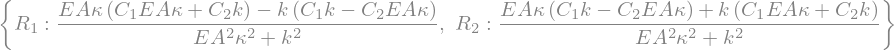

---


In [5]:
springBC = k*w - EA*wz
springBCsol = reflection(springBC) ##:

Randdämpfer

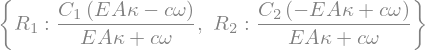

---


In [6]:
dashpotBC = c*wt - EA*wz
dashpotBCsol = reflection(dashpotBC) ##:

Randmasse

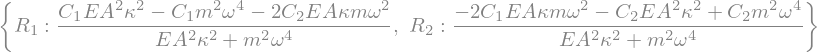

---


In [7]:
massBC = m*wtt - EA*wz
massBCsol = reflection(massBC) ##:

Wie ließe sich die Rechnung für Kombinationen mehrerer Kraftelemente zusammenfassen?

Wie ließe sich die Rechnung durch komplexe Zahlen kompakter formulieren?

## Übergangsbedingungen

![wavebar_tc.png](https://github.com/nagelt/soil_dynamics/raw/master/Images/wavebar_tc.png)

In [8]:
interactive_transition_conditions_plot()   

interactive(children=(IntSlider(value=0, description='$m/m_\\mathrm{ref}$:', max=500, step=10), IntSlider(valu…

Durch welche konstruktiven Maßnahmen ließe sich eine gute Schwingungsisolation erreichen?

### Herleitung der Ausdrücke hinter dem interaktiven Diagramm

In [9]:
m, c, k, w, EA, kappa, z, omega, t = sp.symbols('m c k w EA kappa z omega t', real=True)  # dimensional parameters
C, cT, cR = sp.symbols('C cT cR')   # incident amplitude, transmission and reflection coefficient
   
w_left = cR*C*sp.exp(sp.I*(-kappa*z - omega*t)) + C*sp.exp(sp.I*(+kappa*z - omega*t))    # waves in left domain (incident and reflected)
w_left_z =  sp.diff(w_left, z)   # spatial derivative
w_left_t =  sp.diff(w_left, t)   # temporal derivative (velocity)
w_left_tt = sp.diff(w_left_t, t)   # temporal derivative (acceleration)

w_right  = cT*C*sp.exp(sp.I*(+kappa*z - omega*t))    # wave in right domain (transmitted)
w_right_z =  sp.diff(w_right, z)   # spatial derivative
w_right_t =  sp.diff(w_right, t)   # temporal derivative (velocity)
w_right_tt = sp.diff(w_right_t, t)   # temporal derivative (acceleration)

kinematics = w_left - w_right   # continuity in displacement
kinematics_z0 = kinematics.subs(z, 0)   # evaluate TC at z=0
kinematics_eq = sp.simplify(kinematics_z0*sp.exp(sp.I*omega*t))   # cancel time-depependency

#kinetics = EA*(w_right_z-w_left_z) - k*w_right - c*w_right_t - m*w_right_tt   # momentum balance
kinetics = EA*(w_right_z-w_left_z) - k*w_left - c*w_left_t - m*w_left_tt   # momentum balance
kinetics_z0 =  kinetics.subs(z, 0)   # evaluate TC at z=0
kinetics_eq = sp.simplify(kinetics_z0*sp.exp(sp.I*omega*t))   # cancel time-depependency

TCsol = sp.solve([kinematics_eq, kinetics_eq], cR, cT)   # solve transition conditions
cT = TCsol[cT]   # transmission coefficient
cR = TCsol[cR]   # reflection coefficient

print("cT = {}".format(cT))
print("cR = {}".format(cR))

cT = 2*I*EA*kappa/(2*I*EA*kappa + I*c*omega - k + m*omega**2)
cR = (-I*c*omega + k - m*omega**2)/(2*I*EA*kappa + I*c*omega - k + m*omega**2)
